## Foundations of Data Science: Inferential Thinking by Resampling

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 7: Decisions and uncertainty

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 12)

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The problem:

    Of 12 discussion sections is the one with lowest average mean midterm score, lower than would be expected by chance.

In [2]:
scores = pd.read_csv('data/scores_by_section.csv')
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
5,3,25
...,...,...
353,3,17
354,5,24
355,2,16


In [3]:
scores.groupby('Section').describe()

Midterm                                        
          count  mean  std  min   25%   50%   75%   max
Section                                                
1         32.00 15.59 6.89 0.00 12.75 15.00 21.00 25.00
2         32.00 15.12 5.91 0.00 12.75 16.50 18.25 24.00
3         27.00 13.67 7.55 0.00  9.50 15.00 20.00 25.00
4         30.00 14.77 5.41 0.00 11.25 14.00 19.00 24.00
5         33.00 17.45 5.59 7.00 13.00 18.00 22.00 25.00
6         32.00 15.03 5.01 0.00 11.00 16.00 18.00 24.00
7         24.00 16.62 6.12 6.00 10.75 17.00 22.00 25.00
8         29.00 16.31 6.04 0.00 13.00 17.00 21.00 25.00
9         30.00 14.57 7.26 0.00 11.25 16.00 18.75 25.00
10        34.00 15.24 5.79 0.00 12.00 16.00 20.00 23.00
11        26.00 15.81 6.67 0.00 12.25 17.00 20.50 25.00
12        30.00 15.73 4.62 9.00 11.25 16.00 19.00 25.00

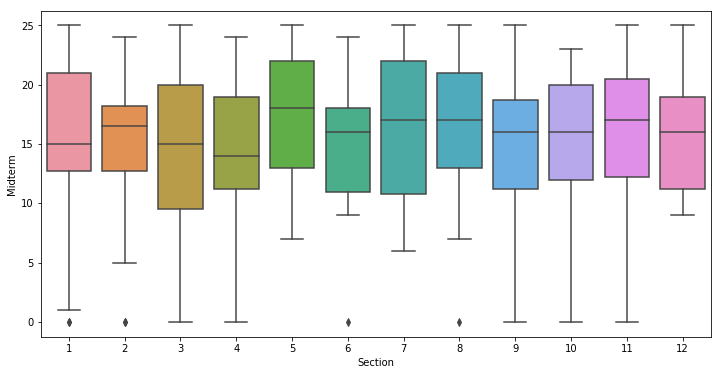

In [4]:
# Box plots by section
#  middle line indicates median score
fig = plt.figure(figsize=(12, 6))
sns.boxplot('Section', 'Midterm', data=scores)
plt.show()

### Method 1: ANOVA

Assumptions:
1) Each population from which a sample is taken is normal
2) All samples are randomly selected and independent
3) The populations have equal standard deviations (homogeneity of variance)
4) The single factor is a categorical variable
5) The response is a numerical variable on an interval or ratio scale

In [5]:
# Using Statsmodules
model = smf.ols('Midterm ~ Section', data=scores).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Effect size
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1] / aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = ((aov[:-1]['sum_sq'] - (aov[:-1]['df']*mse)) / 
                       (sum(aov['sum_sq']) + mse))
    return aov
 
eta_squared(aov_table)
omega_squared(aov_table)

# ANOVA Table w/ effectsize
aov_table.astype(float).round(4)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Section,9.07,1.00,0.24,0.62,0.00,-0.00
Residual,"13,230.66",357.00,nan,nan,nan,nan


### Method 2: Simulation

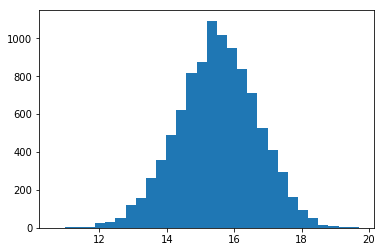

In [11]:
n = 27
observed_average = scores.loc[scores.Section == 3].Midterm.mean()

sample = [np.random.choice(scores.Midterm.values, size=n).mean() 
          for _ in range(10000)]

plt.hist(sample, bins=30)
plt.show()

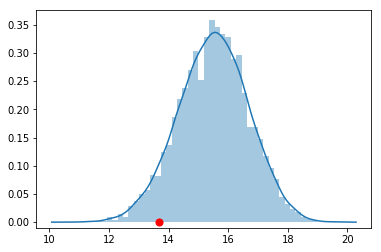

In [18]:
ax = sns.distplot(sample)
plt.scatter(observed_average, 0, color='red', s=50, zorder=2)
ax.set_ylim(-0.01)
plt.show()

In [ ]:
# Proportion of sample means that are less than the observed mean
np.count_nonzero(np.array(sample) < observed_average) / len(sample)

In [ ]:
np.percentile(np.array(sample), 5)